In [ ]:
import sys
from pathlib import Path

# Make sure project root is on path
sys.path.append(str(Path.cwd()))

from lab_fetcher.hrrr_fetcher import HRRRFetcher
from lab_fetcher.rave_fetcher import RAVEFetcher

import xarray as xr
import matplotlib.pyplot as plt

# Download Testing

## Herbie - HRRR 3km Lambert Conformal

In [ ]:
h = HRRRFetcher()

hrrr_ds = h.fetch_range(
    "2025-01-01 03:00",
    "2025-01-01 05:00"
)

hrrr_ds

maybbe silence hypercube warning: xr.set_options(use_new_combine_kwarg_defaults=True)

In [ ]:
print(hrrr_ds.dims)
print(hrrr_ds.coords)
print(hrrr_ds.data_vars)

## RAVE 0.03deg Lat/Lon

In [ ]:
r = RAVEFetcher()

rave_ds = r.fetch_range(
    "2025-01-01 03:00",
    "2025-01-01 05:00"
)

rave_ds

In [ ]:
print(rave_ds.dims)
print(rave_ds.coords)
print(rave_ds.data_vars)

# Bounding test

In [1]:
import sys
from pathlib import Path

# Make sure project root is on path
sys.path.append(str(Path.cwd()))

from lab_fetcher.hrrr_fetcher import HRRRFetcher
from lab_fetcher.rave_fetcher import RAVEFetcher

import xarray as xr
import matplotlib.pyplot as plt

c:\Users\Alex\anaconda3\envs\labForge\Lib\site-packages\pyproj\network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
from lab_fetcher.utils import convert_bbox_to_360

In [3]:
PAD = 0.25
MT_BBOX = (
    -116.1 - PAD,
    -104.0 + PAD,
    44.2 - PAD,
    49.1 + PAD
)

In [4]:
from lab_fetcher.hrrr_fetcher import HRRRFetcher
from lab_fetcher.rave_fetcher import RAVEFetcher

In [5]:
h = HRRRFetcher()
r = RAVEFetcher()

In [6]:
hrrr_ds = h.fetch_range(
    "2025-01-01 03:00",
    "2025-01-01 05:00",
    bbox=MT_BBOX
)

Fetching HRRR: 2025-01-01 03:00:00
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-01 03:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\Alex\anaconda3\envs\labForge\Lib\site-packages\cfgrib\xarray_store.py:51: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  o = xr.merge([o, ds], **kwargs)
c:\Users\Alex\anaconda3\envs\labForge\Lib\site-packages\cfgrib\xarray_store.py:51: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  o = xr.merge([o, ds], **kwargs)
c:\Users\Alex\

Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.
Fetching HRRR: 2025-01-01 04:00:00
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-01 04:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


c:\Users\Alex\anaconda3\envs\labForge\Lib\site-packages\cfgrib\xarray_store.py:51: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  o = xr.merge([o, ds], **kwargs)
c:\Users\Alex\anaconda3\envs\labForge\Lib\site-packages\cfgrib\xarray_store.py:51: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  o = xr.merge([o, ds], **kwargs)
c:\Users\Alex\

Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.
Fetching HRRR: 2025-01-01 05:00:00
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-01 05:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.


c:\Users\Alex\anaconda3\envs\labForge\Lib\site-packages\cfgrib\xarray_store.py:51: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  o = xr.merge([o, ds], **kwargs)
c:\Users\Alex\anaconda3\envs\labForge\Lib\site-packages\cfgrib\xarray_store.py:51: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  o = xr.merge([o, ds], **kwargs)
c:\Users\Alex\

In [7]:
hrrr_ds

<xarray.Dataset> Size: 5MB
Dimensions:              (time: 3, y: 244, x: 348)
Coordinates:
  * time                 (time) datetime64[ns] 24B 2025-01-01T03:00:00 ... 20...
    valid_time           (time) datetime64[ns] 24B 2025-01-01T03:00:00 ... 20...
    latitude             (y, x) float64 679kB 42.77 42.77 42.78 ... 50.45 50.46
    longitude            (y, x) float64 679kB 244.0 244.0 244.1 ... 256.1 256.1
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 10.0
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    u10                  (time, y, x) float32 1MB -0.7487 -0.5612 ... 5.084
    v10                  (time, y, x) float32 1MB -0.7628 -0.7628 ... -4.718
    t2m                  (time, y, x) float32 1MB 272.7 272.9 ... 257.9 257.8
    d2m                  (time, y, x) float32 1MB 271.2 271.4 ... 256.1 256.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\Alex\Desktop\Lab\labfetch\data\hrrr\hrr...
    search:                  TMP:2 m|DPT:2 m|UGRD:10 m|VGRD:10 m|PBLH|PRES:sfc

In [8]:
MT_BBOX_RAVE = convert_bbox_to_360((-116, -104, 44, 49))

In [9]:
rave_ds = r.fetch_range(
    "2025-01-01 03:00",
    "2025-01-01 05:00",
    bbox=MT_BBOX_RAVE
)

Checking: https://www.ospo.noaa.gov/pub/Blended/RAVE/RAVE-HrlyEmiss-3km/2025/01/
Found 3 remote files matching date range.


c:\Users\Alex\Desktop\Lab\labfetch\lab_fetcher\rave_fetcher.py:132: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  combined = xr.concat(datasets, dim="time")


In [10]:
print(rave_ds)

<xarray.Dataset> Size: 25MB
Dimensions:          (time: 3, grid_yt: 167, grid_xt: 400)
Coordinates:
  * time             (time) datetime64[ns] 24B 2025-01-01T03:00:00 ... 2025-0...
  * grid_yt          (grid_yt) float32 668B 1.094e+03 1.095e+03 ... 1.26e+03
  * grid_xt          (grid_xt) float32 2kB 3.302e+03 3.303e+03 ... 3.701e+03
    grid_lont        (grid_yt, grid_xt) float32 267kB 244.0 244.0 ... 256.0
    grid_latt        (grid_yt, grid_xt) float32 267kB 48.99 48.99 ... 44.01
Data variables: (12/30)
    area             (time, grid_yt, grid_xt) float32 802kB 7.302 ... 8.003
    land_cover       (time, grid_yt, grid_xt) float32 802kB 1.0 1.0 ... 1.0 1.0
    FRP_MEAN         (time, grid_yt, grid_xt) float32 802kB nan nan ... nan nan
    FRP_SD           (time, grid_yt, grid_xt) float32 802kB nan nan ... nan nan
    FRE              (time, grid_yt, grid_xt) float32 802kB nan nan ... nan nan
    CO2              (time, grid_yt, grid_xt) float32 802kB nan nan ... nan nan
    ...      

In [11]:
print(rave_ds.grid_lont.min().values)
print(rave_ds.grid_lont.max().values)

244.005
255.975


regrid

In [12]:
print(rave_ds.sizes)
print(hrrr_ds.sizes)

Frozen({'time': 3, 'grid_yt': 167, 'grid_xt': 400})
Frozen({'time': 3, 'y': 244, 'x': 348})


In [13]:
from lab_fetcher.grid import regrid_rave_to_hrrr

rave_on_hrrr = regrid_rave_to_hrrr(
    rave_ds,
    hrrr_ds,
    method="bilinear"      # use "conservative" for emissions mass conservation
)

c:\Users\Alex\anaconda3\envs\labForge\Lib\site-packages\xesmf\backend.py:41: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not F_CONTIGUOUS. ' 'Will affect performance.')


In [14]:
rave_on_hrrr.dims == hrrr_ds.dims


<frozen _collections_abc>:801: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
<frozen _collections_abc>:861: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


True

In [15]:
print(hrrr_ds.dims)
print(rave_on_hrrr.dims)


FrozenMappingWarningOnValuesAccess({'time': 3, 'y': 244, 'x': 348})
FrozenMappingWarningOnValuesAccess({'time': 3, 'y': 244, 'x': 348})


In [16]:
print(rave_on_hrrr.latitude.equals(hrrr_ds.latitude))
print(rave_on_hrrr.longitude.equals(hrrr_ds.longitude))

True
True


In [17]:
combined = xr.merge([hrrr_ds, rave_on_hrrr])

In [18]:
combined

<xarray.Dataset> Size: 36MB
Dimensions:              (time: 3, y: 244, x: 348)
Coordinates:
  * time                 (time) datetime64[ns] 24B 2025-01-01T03:00:00 ... 20...
    valid_time           (time) datetime64[ns] 24B 2025-01-01T03:00:00 ... 20...
    latitude             (y, x) float64 679kB 42.77 42.77 42.78 ... 50.45 50.46
    longitude            (y, x) float64 679kB 244.0 244.0 244.1 ... 256.1 256.1
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 10.0
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables: (12/34)
    u10                  (time, y, x) float32 1MB -0.7487 -0.5612 ... 5.084
    v10                  (time, y, x) float32 1MB -0.7628 -0.7628 ... -4.718
    t2m                  (time, y, x) float32 1MB 272.7 272.9 ... 257.9 257.8
    d2m                  (time, y, x) float32 1MB 271.2 271.4 ... 256.1 256.0
    area                 (time, y, x) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    land_cover           (time, y, x) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ...                   ...
    TPM_scaled           (time, y, x) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    VOCs_scaled          (time, y, x) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    CH4_scaled           (time, y, x) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    QA                   (time, y, x) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Prediction_Flag      (time, y, x) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Cloud_Fraction       (time, y, x) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\Alex\Desktop\Lab\labfetch\data\hrrr\hrr...
    search:                  TMP:2 m|DPT:2 m|UGRD:10 m|VGRD:10 m|PBLH|PRES:sfc

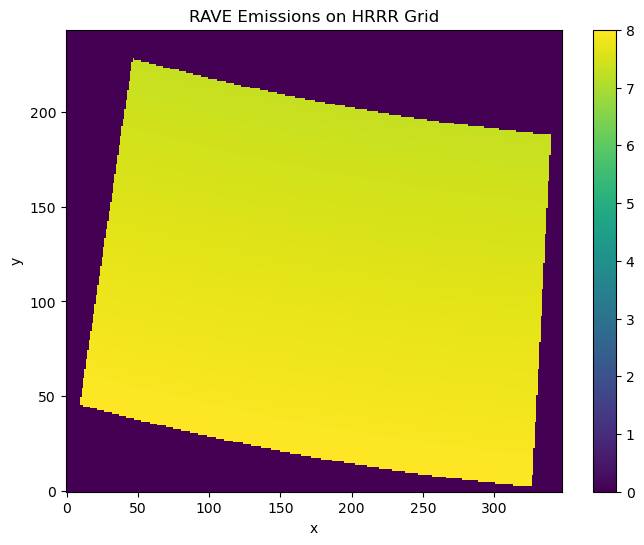

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
rave_on_hrrr.isel(time=0).to_array().isel(variable=0).plot()
plt.title("RAVE Emissions on HRRR Grid")
plt.show()


In [20]:
import os
print(os.environ["ESMFMKFILE"])

C:\Users\Alex\anaconda3\envs\labForge\Library\lib\esmf.mk
